# Labo 2

## La convolution
Il existe plusieurs opérations permettant de manipuler des images, l'une des plus utilisées est la convolution. Pour rappel, l'opération de convolution pour un signal __discret__ se définit comme: $$[f*g](n)=\sum _{i=-inf}^{+inf} f(i) g(n-i)=\sum _{i=-inf}^{+inf} g(i) f(n-i)$$
Dans le cas d'une image, le signal est en 2 dimensions et la formule se réécrit comme:
$$[f*g](m,n)=\sum _{i=-inf}^{+inf}\sum _{j=-inf}^{+inf} f(i,j) g(m-i,n-j)=\sum _{i=-inf}^{+inf} g(i,j) f(m-i,n-j)$$

Ici, f représente l'image qui va subir l'opération et g est ce qu'on appelle le __kernel__.

En pratique, cette formule mathémtique se traduit assez simplement, comme le montre l'image suivante:

![SegmentLocal](./3D_Convolution_Animation.gif "segment")

Le kernel est une fenêtre qui coulisse sur chacun des pixels de l'image f. Le nouveau pixel obtenu est une combinaison linéaire de l'ancien pixel ainsi que de ses proches voisins (en fonction de la dimension du kernel). Les coefficients de la combinaison linéaire sont le kernel g. Lorsque l'image est une image en _grayscale_, il ne faut faire l'opération qu'une fois, mais lorsque c'est une image RGB, il faut appliquer l'opération sur chacun des _canaux_.

Il existe quelques contraintes sur les kernels utilisés: la dimension du kernel doit être impaire et plus petite que celle de l'image (par exemple 3x3) et on normalise les coefficients du kernel afin que leur somme fasse 0,1 ou -1. Il faut aussi décider ce qu'il se passe sur les bords, 3 possibilités: dupliquer les pixels sur les bords pour appliquer la convolution (voir image), mettre ces coefficients à 0 ou ne pas faire la convolution sur les bords. 

La première utilisation de cette opération de convolution est le __filtre de convolution__.


## Filtre de convolution
Nous allons implémenter l'opération de convolution et tester le filtre de convolution avec différents kernels afin d'en voir les résultats.

In [95]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

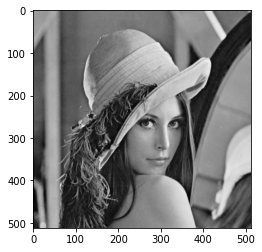

In [102]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return np.uint8(gray)

img = mpimg.imread("lena.tif")
gray =rgb2gray(img)

# Pour afficher des images scalaires, imshow utilise une colormap (cmap)
plt.imshow(gray,cmap='gray')
plt.show()

## Exercice 1

Définissez `convolution2D` qui applique la convolution avec pour kernel `H` sur `X`. le résultat de la convolution est de même forme que `X`. Choisissez comment vous voulez traiter le cas du bord.

In [2]:
def convolution2D(X,H):
    pass

Une fois votre fonction définie, le code qui suit doit fonctionner

Vous y trouverez plusieurs types de kernel à appliquer sur l'image. Vous pouvez aussi combiner plusieurs convolutions à la suite l'une de l'autre. N'hésiter pas à en inventer ou rechercher des kernels courant sur le net.

In [ ]:
#H=np.array([[0,-1,0],[-1,5,-1],[0,-1,0]]) #sharpening
#H=np.ones((3,3))*1.0/9 #blur
H=np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]) #edge detection

res = convolution2D(gray,H)

# np.clip permet de recadrer les valeurs de l'array entre [0,255]
# qui est l'intervalle des valeurs possibles pour des pixels
res = np.clip(res, 0, 255)

plt.imshow(res, cmap='gray')
plt.show()

## Scipy

Vous pouvez calculer des opérations de convolutions avec `convolve2d` du module `scipy.signal` ce qui est nettement plus rapide. La fonction `filter2D` d'OpenCV permet aussi de le faire.

## Exercice 2

Utilisez une des fonctions prédéfinies citées plus haut pour effectuer une convolution.

## Binarisation

La binarisation d'une image consiste à produire une image dont les pixels sont des booléens. On part généralement d'une image d'entrée et on applique une condition sur chaque pixel. Le but est d'isoler l'objet intéressant de l'image et d'obtenir des pixels `True` pour les pixels qui lui appartiennent (*foreground*) et des pixels `False` pour les pixels du *background*.

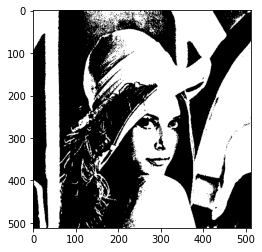

In [106]:
img = mpimg.imread("lena.tif")
gray =rgb2gray(img)

# numpy magic !
bin = gray > 128

plt.imshow(bin, cmap='gray')
plt.show()

Une image binarisée peut contenir des `True` et des `False` mais aussi des `0` et des `1` ou encore des `0` et des `255`. Nous verrons plus loin qu'OpenCV n'aime pas trop les images de booléens et qu'il faudra les convertir en entiers non signé de 8 bits.

In [ ]:
bin = np.uint8(bin)

## Sélection de couleur

Une façon courante de binariser est de sélectionner une couleur particulière de l'image. Attention que deux couleur visuellement proche ne sont parfois pas très proche dans l'espace RGB. Il est généralement recommandé de passer en HSV pour effectuer ce genre d'opération.

In [ ]:
img = mpimg.imread("nemo.jpg")

hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

## Exercice 3

Utilisez la fonction `inRange` d'OpenCV pour sélectionner la couleur rouge de l'image `nemo.jpg`.

## Labellisation

La labellisation consiste à marquer chaque groupe de pixels contigus du *foreground* d'un label entier. Le but est de pouvoir appliquer un traitement à chaque objet détectés.

La fonction `connectedComponents` d'OpenCV permet d'effectuer une labellisation.

## Exercice 4

Combien de zones rouges distinctes obtenez vous pour l'image `nemo.jpg` ?

## Opérations Morphologiques

Les opérations morphologiques permettent de manipuler une image binaire en faisant grandir ou rétrécir des zones de *foreground*. Vous trouverez plus d'information dans la page suivante:

[https://docs.opencv.org/4.5.4/d9/d61/tutorial_py_morphological_ops.html](https://docs.opencv.org/4.5.4/d9/d61/tutorial_py_morphological_ops.html)

## Exercice 5

Eliminez le bruit de votre binarisation de `nemo.jpg` avant de recompter les zones rouges.

## Exercice 6

Binarisez et labellisez l'image `coins.jpg`. Combien y a-t-il de pièces. Sachant qu'il ne peut y avoir que des pièces de 1€ et de 10c, écrivez une fonction qui renvoie la somme d'argent présente dans une image de ce type.

# Points d'intérêt

La detection de points d'intérêt est à la base d'un grand nombre d'algorithme basé sur le traitement d'image. Une des méthodes utilisées et la detection de coins de Harris. Vous trouverez plus d'informations sur la page suivantes:

[https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html)

# Exercice 7

Détectez les points d'intérêt de l'image `chessboard.jpg`.

# Transformée de Hough

La transformée de Hough permet de detecter des formes paramétriques dans une image. Elle est souvent utilisée pour détecter des droites ou des cercles. Vous trouverez plus d'information à la page suivante:

[https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_houghlines/py_houghlines.html](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_houghlines/py_houghlines.html)

# Exercice 8

Détectez les droites de l'image `chessboard.jpg`

# Exercice final

Utilisez le résultat du labo précédent pour remettre à plat le document présent dans la photo `document.jpg`. Cette fois, la détection de la position du document doit être automatique.